
# Q2

In [520]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [521]:
X = np.array([[1, 2], [2, 4], [3, 6], [4, 8]])
Y= np.array([[2],[3],[4],[5]])

In [522]:
F=LinearRegression()

In [523]:
linear_model=F.fit(X,Y)

In [524]:
linear_model.score(X,Y)

1.0

when the matrix is not invertible scikitlearn uses the pseudo inverse in place of inverse of the matrix 

# Q3

In [525]:
from sklearn.model_selection import train_test_split
import pandas as pd
import math

In [526]:
data = pd.read_excel('Real_estate_valuation_data_set.xlsx')

In [527]:
columns = ["X2 house age","X3 distance to the nearest MRT station","X4 number of convenience stores","X5 latitude","X6 longitude"]
data_features = data[columns]
y = data["Y house price of unit area"]

In [528]:
train_x,test_x,train_y,test_y = train_test_split(data_features,y,random_state= 564)

In [529]:
model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [530]:
model.score(test_x,test_y)

0.5824518375069917

In [531]:
predicted = model.predict(test_x)
test_y=test_y.reset_index(drop=True)

In [532]:
root_mean_se=0
for i in range (0,len(predicted)):
    k=(predicted[i]-test_y[i])**2
    root_mean_se=root_mean_se+k
    
print('rms error is ' , math.sqrt(root_mean_se/len(predicted)))

rms error is  8.719481760532263


In [533]:
print(list(zip(model.coef_, columns)))

[(-0.26778535583752217, 'X2 house age'), (-0.0047103462948912145, 'X3 distance to the nearest MRT station'), (1.0257441249225376, 'X4 number of convenience stores'), (243.52358044835398, 'X5 latitude'), (-39.04196446938943, 'X6 longitude')]


(b) based on the coefficients of different features we cannot say anything about the imprtance of different features since the range of values of different features are not similar. therefore, we cannot assume that higher the coefficient value means greater the importance of the feature

 now using the normalized data

In [41]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [46]:
data_normalized = normalize(data)
data_features_normalized = data_normalized[columns]
y_normalized = data_normalized["Y house price of unit area"]

In [47]:
train_x,test_x,train_y,test_y = train_test_split(data_features_normalized,y_normalized,random_state= 564)

In [49]:
model_normalized = LinearRegression()
model_normalized.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
model_normalized.score(test_x,test_y)

0.5824518375069996

In [52]:
print(list(zip(model_normalized.coef_, columns)))

[(-0.10672428194434465, 'X2 house age'), (-0.27707629121717237, 'X3 distance to the nearest MRT station'), (0.0933343152795857, 'X4 number of convenience stores'), (0.18285319252591353, 'X5 latitude'), (-0.03294587611366179, 'X6 longitude')]


based on the value of the coefficients we can surely tell about the importance of the features here. this is because the range of values of the features is are similar. this implies that greater the value of the coefficient of the feature, more the importance of the feature

 cross validation

In [429]:
from itertools import combinations 

In [534]:
best_error=9999999
best_feature_set = columns

for i in range (1,len(columns)):
    feature_sets = list(combinations(columns,i))
    
    for feature_set in feature_sets:
        tr_data = data_features[list(feature_set)]
        train_xcv,test_xcv,train_ycv,test_ycv = train_test_split(tr_data,y,random_state= 564)
        
        modelcv=LinearRegression()
        modelcv.fit(train_xcv,train_ycv)
        y_predcv= modelcv.predict(test_xcv)
        test_ycv=test_ycv.reset_index(drop=True)
        rms=0
        for h in range (0,len(y_predcv)):
            k=(y_predcv[h]-test_ycv[h])**2
            rms=rms+k 
        if rms<best_error:
            best_error = rms
            best_feature_set = feature_set
            
        
print('least_error is', math.sqrt(best_error/len(y_predcv)))  
print(best_feature_set)

least_error is 8.679800297377753
('X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude')


the model of the above features obtained through cross validation performs similar to that of the model obtained through all the features of the data 

In [447]:
best_feature_set=[]
best_error=9999999
for i in range (1,len(columns)):
    feature_sets = list(combinations(columns,i))
    error_set=[]
    for feature_set in feature_sets:
        tr_data = data_features[list(feature_set)]
        train_xcv,test_xcv,train_ycv,test_ycv = train_test_split(tr_data,y,random_state= 564)
        
        modelcv=LinearRegression()
        modelcv.fit(train_xcv,train_ycv)
        y_predcv= modelcv.predict(test_xcv)
        test_ycv=test_ycv.reset_index(drop=True)
        rms=0
        for h in range (0,len(y_predcv)):
            k=(y_predcv[h]-test_ycv[h])**2
            rms=rms+k   
        error_set.append(rms)
        
    max_index=error_set.index(max(error_set))
    best_feature_set.append(feature_sets[max_index])
print(best_feature_set[1:])
print(best_feature_set[-1])

[('X2 house age', 'X5 latitude'), ('X2 house age', 'X5 latitude', 'X6 longitude'), ('X2 house age', 'X3 distance to the nearest MRT station', 'X5 latitude', 'X6 longitude')]
('X2 house age', 'X3 distance to the nearest MRT station', 'X5 latitude', 'X6 longitude')


# Q4

 NormalEquationRegression

In [408]:
from numpy.linalg import inv
import time 

In [409]:
def rmse(x,y,theta):
    r,c=x.shape
    X=np.c_[np.ones(r),x]
    predicted = np.matmul(X,theta)
    root_mean_se=0
    for i in range (0,len(y)):
        k=(predicted[i,]- y[i,])**2
        root_mean_se=root_mean_se+k
    
    return math.sqrt(root_mean_se/len(predicted))

In [410]:
def NormalEquationRegression(x,y):
    r,c = x.shape
    X = np.c_[np.ones(r),x]
    X_t = np.transpose(X)
    X_t_X = np.matmul(X_t,X)
    X_t_X_inverse = inv(X_t_X)
    X_t_y = np.matmul(X_t,y)
    theta = np.matmul(X_t_X_inverse,X_t_y)
    ans= theta.reshape(c+1,1)
    return ans
    
    

In [411]:
time_start=time.time()
theta = NormalEquationRegression(data_features.values , y.values)
time_stop=time.time()

In [412]:
time_taken = time_stop - time_start
print('time taken is ',time_taken)
print ('error is', rmse(data_features.values , y.values,theta))

time taken is  0.00398564338684082
error is 8.899542229357131


Gradient Descent Regression

In [413]:
def GradientDescentRegression(x,y,alpha,iterations):
    r,c = x.shape
    y = y.reshape(-1,1)
    X = np.c_[np.ones(r),x]
    theta = np.random.random((1,c+1))
    for i in range (1,iterations):
        y_predict = np.matmul(X,np.transpose(theta))
        error = y - y_predict
        updates = np.matmul(np.transpose(error),X)
        theta = theta - alpha*updates
    ans=theta.reshape(c+1,1)
    return ans

In [422]:
time_start=time.time()
theta = GradientDescentRegression(data_features.values , y.values,0.000000000000001,150)
time_stop=time.time()

In [423]:
time_taken = time_stop - time_start
print('time taken is ',time_taken)
print ('error is', rmse(data_features.values , y.values,theta))

time taken is  0.010663747787475586
error is 569.3162338659153


Gradient Descent Autograd Regression

In [233]:
from autograd import grad 

In [234]:
def error(theta,x,y):
    r,c = x.shape
    r_y,_=y.shape
    
    y_predict = np.dot(x,theta)
    error = np.sum(np.square(y - y_predict))/r_y
    return error

In [235]:
def GradientDescentAutogradRegression(x,y,alpha,iterations):
    r,c = x.shape
    y = y.reshape(-1,1)
    theta = np.random.random((c+1,1))
    X = np.c_[np.ones(r),x]
    
    gradient=grad(error)
    
    for _ in range(0,iterations):
        theta = theta -alpha*gradient(theta,X,y)
    return theta 

In [404]:
time_start=time.time()
theta = GradientDescentAutogradRegression(data_features.values , y.values,0.000001,100)
time_stop=time.time()

In [405]:
time_taken = time_stop - time_start
print('time taken is ',time_taken)
print ('error is', rmse(data_features.values , y.values,theta))

time taken is  19.327567100524902
error is 6.232080248288361e+68


In [449]:
import torch 
from torch.autograd import Variable

In [463]:
def  gradientDescentPyTorchRegression(x, y, num_iterations,alpha):
    r,c=x.shape
    X = np.c_[np.ones(r),x]
    y = np.transpose(y)
    N = len(y)
    theta = torch.rand((np.shape(X)[1], 1) , requires_grad = True)
    
    X = torch.from_numpy(X).float()
    y = torch.from_numpy(y).float()
    
    X.requires_grad = False
    y.requires_grad = False
    
    for _ in range(num_iterations):
        theta.requires_grad_(True)
        theta.grad = None
        y_pred = torch.matmul(X, theta)
        error = ((y - y_pred)**2).sum()/N
        error.backward() #Computes and returns the sum of gradients
        gradient = theta.grad
        theta.requires_grad_(False)
        theta = theta - alpha * gradient
    return theta.numpy()

In [473]:
time_start=time.time()
gradientDescentPyTorchRegression(data_features.values , y.values,2000,0.000000000001)
time_stop = time.time()

In [474]:
time_taken = time_stop - time_start
print('time taken is ',time_taken)
print ('error is', rmse(data_features.values , y.values,theta))

time taken is  2.2030906677246094
error is 569.3162338659153


# Q5

In [383]:
x = np.arange(0, 20.1, 0.1)
r=len(x)
np.random.seed(0)
z = 1*x**5 + 3*x**4 - 100*x**3 + 8*x**2 -30*x - 1e5 + np.random.randn(len(x))*1e5

In [384]:
def input_matrix(x,poly_size):
    ans=np.zeros((len(x),poly_size))
    for i in range (0,len(x)):
        for j in range (1,poly_size+1):
            ans[i,j-1]=x[i]**j
    return ans

In [426]:
X=np.c_[np.ones(r),input_matrix(x,5)]
z=z.reshape(-1,1)

GradientDescentAutogradRegression(X , z,0.0000000000001,100)

array([[ 0.68493197],
       [ 0.65675949],
       [ 0.8620403 ],
       [ 0.09700642],
       [ 0.49472439],
       [ 0.5430903 ],
       [-0.22879312]])

In [427]:
z =3*x**4 - 100*x**3 + 8*x**2 -30*x - 1e5 + np.random.randn(len(x))*1e5
X=np.c_[np.ones(r),input_matrix(x,4)]
z=z.reshape(-1,1)

GradientDescentAutogradRegression(X , z,0.000000000001,100)

array([[ 0.11585714],
       [ 0.89982542],
       [ 0.05636884],
       [ 0.9729321 ],
       [-0.02481741],
       [-1.17058043]])

# Q6

In [543]:
X=np.matrix('1;3;6')
y=np.matrix('6;10;16')
alpha=0.1

(N,d)=np.shape(X)
bias=np.array([1]*N)
temp=np.zeros((N,d+1))
theta=np.zeros((d+1,1))
grad=np.zeros((d+1,1))
temp[:,0]=bias
temp[:,1:]=X
X=np.matrix(temp)

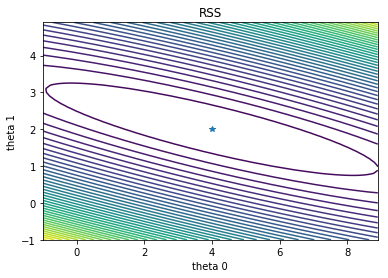

In [544]:
import matplotlib.pyplot as plt


plt.gcf().clear()
tx=np.array(np.arange(-1,9,0.1))
ty=np.array(np.arange(-1,5,0.1))

t1,t2=np.meshgrid(tx,ty,sparse=True)
t1=t1.T
t2=t2
rss=np.zeros((len(t2),len(t1)))

for i in range(len(t1)):
    for j in range(len(t2)):
        theta=np.array([t1[i],t2[j]])
        rss[j,i]=np.sum(np.square((y-(np.matmul(X,theta)))))
tx,ty=np.meshgrid(tx,ty)
plt.contour(tx,ty,rss,50)
plt.plot(4,2,'*')
plt.title('RSS')
plt.xlabel('theta 0')
plt.ylabel('theta 1')
plt.show()

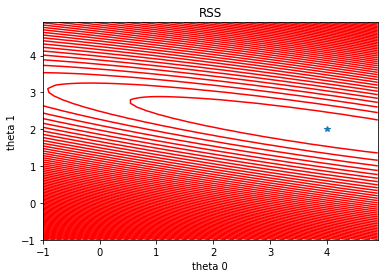

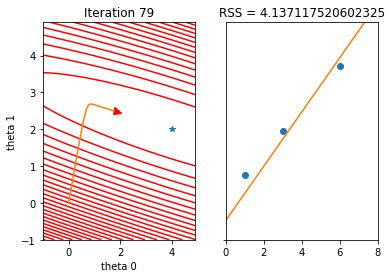

In [547]:
import matplotlib.pyplot as plt

plt.gcf().clear()
theta_x=np.array(np.arange(-1,5,0.1))
theta_y=np.array(np.arange(-1,5,0.1))

theta1,theta2=np.meshgrid(theta_x,theta_y,sparse=True)
theta1=theta1.T
theta2=theta2
res_sum_sq=np.zeros((len(theta2),len(theta1)))

for i in range(len(theta1)):
    for j in range(len(theta2)):
        theta=np.array([theta1[i],theta2[j]])
        res_sum_sq[j,i]=np.sum(np.square((y-(np.matmul(X,theta)))))
theta_x,theta_y=np.meshgrid(theta_x,theta_y)
plt.contour(theta_x,theta_y,res_sum_sq,80,colors='red')
plt.plot(4,2,'*')
plt.title('RSS')
plt.xlabel('theta 0')
plt.ylabel('theta 1')
plt.show()

x_reg=np.linspace(0,8,20)
ar_x=[]
ar_y=[]

theta=np.zeros((2,1))
rs=0
alpha=0.01
plt.gcf().clear()
for i in range(79):
    if i==0:
        tp=np.array([[np.array(theta[0][0]),np.array(theta[1][0])]]).T
    else:
        tp=tn
    grad=-2*X.T*(y-(X*theta))/N
    theta=theta-alpha*grad
    tn=np.array([np.array(theta[0][0])[0],np.array(theta[1][0])[0]])
    rs=np.sum(np.square((y-(np.matmul(X,theta)))))
    x_p=tp[0][0]
    y_p=tp[1][0]
    d_x=tn[0][0]-tp[0][0]
    d_y=tn[1][0]-tp[1][0]
    
    plt.subplot(1,2,1)
    plt.cla()
    ar_x.append(x_p)
    ar_y.append(y_p)
    plt.contour(theta_x,theta_y,res_sum_sq,30,colors='red')
    plt.plot(4,2,'*')
    plt.plot(ar_x,ar_y)
    plt.title('Iteration '+str(i+1))
    plt.xlabel('theta 0')
    plt.ylabel('theta 1')

    plt.arrow(x_p,y_p,d_x,d_y,color='red',head_width=0.2)
    
    plt.subplot(1,2,2)
    plt.cla()
    plt.plot([1,3,6],[6,10,16],'o')
    y_reg=x_p+y_p*x_reg
    plt.plot(x_reg,y_reg,'-','')
    plt.title('RSS = '+str(rs))
    plt.xlim(0,8)
    plt.ylim(0,20)
    
    filename=str(format(i+1, '03d'))+'.png'
    plt.savefig(filename, dpi=96)
    plt.gca()
! convert -delay 10 *.png gif.gif
from IPython.display import Image
Image(url='gif.gif')